# STATISTICS
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## LADY TASTING TEA EXPERIMENT

<center><img src="https://miro.medium.com/max/1100/1*tZ1G1TnuAfjsCx1UHcGxVw.png" width="800"/></center>

The Lady Tasting Tea problem is a randomized experiment designed by Ronald A. Fisher and reported in his book The Design of Experiments.

Fisher describes the problem as follows:

> *A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.*

> *Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.*

<hr style="border:2px solid gray"> </hr>

### NUMBER OF COMBINATIONS

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

As Fisher stated in his book, there are 8 cups of tea used in this experiment:
- 4 cups with the milk poured first
- 4 cups with the tea poured first

<center><img src="https://s3.us-east-2.amazonaws.com/brainder/2015/tastingtea/tea_cups.png" width="500"/></center>

Once the first group of four cups is selected, the second group is made up of the remaining four cups. This means we only actually need to count how many different ways there are to select four cups out of eight. Cups in the experiment have no order, but we will label them with integers 0 to 7 simply for the convenience.

In [1]:
# The eight cups
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

Suppose the lady is *randomly* trying to pick the four cups with milk in first. By randomly, we mean that she can not really tell which cups have the milk in first. The number of ways of selecting four unordered items from eight is given by the [Choose](http://mathworld.wolfram.com/Choose.html) function in mathematics.

In [2]:
# Possible combinations
(8*7*6*5)/(4*3*2*1)

70.0

There are:
- 8 x 7 x 6 x 5 = 1680 ways of choosing 4 cups out of 8
- 4 x 3 x 2 x 1 = 24 different ways of ordering each set of 4 cups

Therefore:
- 1680 / 24 = 70 ways of selecting 4 out of 8 if the order doesn't matter

This means there is only a probability of 1/70 of getting the right answer. 

All 70 possibilities can be enumarated using the combinations function from the *itertool* Python package. It takes a list $l$ of items and a number $n$. It returns/generates each way of selecting $n$ unordered items from $l$.

In [3]:
import itertools

# All possible combinations
poss = list(itertools.combinations(cups, 4))
# Print first 15
poss[0:15]

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7)]

### HYPOTHESES

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In his book, Fisher describes the *null hypothesis*. The null hypothesis is the statement to be countered by the experiment.  In the lady tasting tea experiment, the null hypothesis was that the lady could not tell the difference between a cup of tea with the milk poured in first and the one that had the tea poured in first.

**Null Hypothesis:** Lady can not tell if the cup had milk in it first or last.

Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true. If it is very unlikely, then we may reject the null hypothesis. Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.


**Alternative Hypothesis:** Lady can tell the difference.


Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing. Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [4]:
# Only one of the 70 randomly selected possibilities is the desired result
1 / 70

0.014285714285714285

In [5]:
# Math module
import math

# Number of ways of selecting 4 cups from 8
math.comb(8, 4)

70

In [6]:
# The probability is then
1.0 / math.comb(8, 4)

0.014285714285714285

### DISTRIBUTION

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We may be tempted to allow the possibility of rejecting the null hypothesis if the subject gets three cups right. That would be a mistake, as the following plot shows. It shows the null distribution, the number of ways of guessing for each number of correct cups.

We can see from the plot that there is ~20% (16/70) chance of guessing at least three correct cups, and it can be said that is not unlikely enough to reject the null hypothesis.

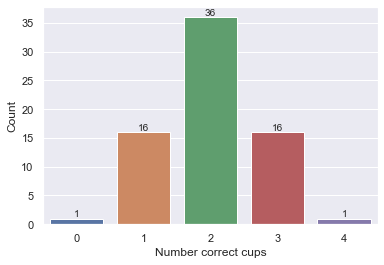

In [7]:
# For random selection
import random
# For plotting
import seaborn as sns

# Total number of cups
cups = list(range(8))

# Pick a random correct answer from the list of 70 to simulate the experiment
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# Plotting
sns.set(rc={'figure.figsize':(25, 6)})
ax = sns.countplot(x=counts)
ax.set(xlabel='Number correct cups', ylabel='Count')
ax.bar_label(ax.containers[0]);

<hr style="border-top: 20px solid #add8e6;" />

<h4 style="color: #001a79;">EXERCISE 1</h4>

<h5 style="color: #001a79;">The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.</h5>
<hr style="border-top: 1px solid #001a79;" />

The following is adapted from https://stackoverflow.com/a/4941932

In [8]:
# Number of ways of selecting 5 cups from 10
math.comb(10, 5)

252

In [9]:
# Probability of randomly selecting correct 5 cups is:
1.0 / math.comb(10, 5)

0.003968253968253968

So, if the experiment was done with 10 cups total, 5 with milk in first and 5 with tea in first, then the chance of selecting correctly randomly is much less than 1%.

We could design the experiment to have 9 cups in total, with 4 with milk in first and 5 with tea in first - or vice versa.

In [10]:
# Number of ways of selecting 4 cups from 9
math.comb(9, 4)

126

In [11]:
# Note the number of ways of selecting 5 cups from 9
math.comb(20, 10)
# It's the same as selecting 4 out of 9

184756

In [12]:
# Probability::
1.0 / math.comb(9, 4)

0.007936507936507936

This is less than 1% too.

We already know that the probability of selecting 4 out of 8 is greater then 1%.

| 5 out of 10 | 4 or 5 out of 9 | 4 out of 8 | 
| :-: | :-: | :-: | 
| 0.3 %  |  0.7 % |  1.42 % |                                                                            

<hr style="border-top: 1px solid  #d48a72;" />
<h5 style="color: #d48a72;">ANSWER: The minimum cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1% is 9 cups, or if we want to design the test with even number of cups, it is 10. <h5>
<hr style="border-top: 1px solid  #d48a72;" />

<hr style="border-top: 1px solid #001a79;" />
<h5 style="color: #001a79;">Bonus: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?</h5>
<hr style="border-top: 1px solid #001a79;" />

We'll first look into the situation with 8 cups in total. If we allow 1 cup to be selected wrong (3 cups have to be correct) there are (4 x 4) 16 possible ways of doing that (when order doesn't matter) - see table below. We need to account the situation if all cups are selected correctly and there is only one way of doing that. So there are 17 possible ways of getting the correct answer if we allow one mistake to be made, which is 17/70 = 0.24 (24%).

| [1] [2] [3] [4]   |   [5] [6] [7] [8] |
| :-: | :-: |
| [1] [2] [3] | [5] |
| [1] [2] [4] | [5] |
| [1] [3] [4] | [5] |
| [2] [3] [5] | [5] |
| **[1] [2] [3]** | **[6]** |
| **[1] [2] [4]** | **[6]** |
| **. . .** | **...** |

$$ PROBABILITY: {{1 + (4x4)} \over 70} = 0.2428 $$

$ p = {{1 + (cups selected)^2} \over (possible combinations)} * 100  $

In [13]:
# Apply formula to 8 cups
total_cups = 8
cup_pick = int(total_cups / 2)
(1+(cup_pick**2))/ math.comb(total_cups, cup_pick) *100

24.285714285714285

We can increase the number of cups and apply the same logic to this. So, for the 10 cups in total, there are 25 possible ways of getting 4 cups correct and 1 wrong, and 1 possible way of getting all cups correct. That is 26 possible combinations, which is ~10%. We can keep increasing the cups and apply the same formula until we are satisfied with the result.

In [14]:
# Increase the number of cups and apply the above formula (we'll start from the beggining)
for i in range (0,100):
    total_cups = i
    cup_pick = int(total_cups / 2)
    p = (1+(cup_pick**2))/ math.comb(total_cups, cup_pick) * 100
    if p < 1:
        break
    print ("Total cups:", total_cups, "Probability: ", p, "%")

Total cups: 0 Probability:  100.0 %
Total cups: 1 Probability:  100.0 %
Total cups: 2 Probability:  100.0 %
Total cups: 3 Probability:  66.66666666666666 %
Total cups: 4 Probability:  83.33333333333334 %
Total cups: 5 Probability:  50.0 %
Total cups: 6 Probability:  50.0 %
Total cups: 7 Probability:  28.57142857142857 %
Total cups: 8 Probability:  24.285714285714285 %
Total cups: 9 Probability:  13.492063492063492 %
Total cups: 10 Probability:  10.317460317460316 %
Total cups: 11 Probability:  5.627705627705628 %
Total cups: 12 Probability:  4.004329004329004 %
Total cups: 13 Probability:  2.156177156177156 %
Total cups: 14 Probability:  1.4568764568764567 %


In [15]:
# 15 cups total
total_cups = 15
cup_pick = int(total_cups / 2)
(1+(cup_pick**2))/ math.comb(total_cups, cup_pick) * 100

0.777000777000777

In [16]:
# 16 cups total
total_cups = 16
cup_pick = int(total_cups / 2)
(1+(cup_pick**2))/ math.comb(total_cups, cup_pick) * 100

0.5050505050505051

<hr style="border-top: 1px solid  #d48a72;" />
<h5 style="color: #d48a72;">ANSWER: To allow one cup to be selected incorrectly, but keeping the treshold of 1%, we should have at least 15 cups in total, or if we want to keep the number of cups even, then 16. <h5>
<hr style="border-top: 1px solid  #d48a72;" />

<hr style="border-top: 20px solid #add8e6;" />

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 2</h4>

<h5 style="color: #001a79;">Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.</h5>
<hr style="border-top: 1px solid #001a79;" />

In [17]:
# Statisctical methods
import scipy.stats as ss

The contingency table:

|  | TEA | MILK | 
| :-: | :-: | :-: | 
| **TEA** |  4 |  0 |
| **MILK** |  0 |  4 |

In [18]:
# Perform the test on the table above
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428567)

We can see that the p-value generated when running the fisher-exact function is exactly double of what we have calculated before.

In [19]:
1.0 / math.comb(8, 4), (ss.fisher_exact([[4, 0], [0, 4]])[1])/2

(0.014285714285714285, 0.014285714285714284)

When not specified differently the fisher_exact *alternative* parameter is set to be *two-sided*. This gives a p-value doubled to the one we were expecting. This could be due to the fact that selecting the correct cups have 2 possible situations (if not specified differently). Selecting all the cups correctly has the same possibility as selecting none. To exclude one situation and only allow selecting the cups we want to be selected, this needs to be specified when testing and we do that by setting the alternative to *greater*.

In [20]:
p = ss.fisher_exact([[4, 0], [0, 4]], alternative = "greater")
p[1]

0.014285714285714284

<hr style="border-top: 20px solid #add8e6;" />

<hr style="border:2px solid gray"> </hr>

## STUDENT $t$-TEST

<center><img src="https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg" width="300"/></center>

|William Sealy Gosset |
| :-: |
| Developed the "t-statistic" and published it under the pseudonym of "Student" |

$T$-tests are among the most common statistical tests performed in world. They are used to determine if there is a significant difference between the means of two groups and how they are related. T-tests are used when the data sets follow a normal distribution and have unknown variances

We will focus on the practicalities of performing $t$-tests in Python further in this notebook.

<hr style="border:2px solid gray"> </hr>

In [21]:
# To work with arrays
import numpy as np

# To work with dataframes
import pandas as pd

# Statistics
import scipy.stats as ss
import statsmodels.stats.weightstats as stat

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar. In the real world, we only see the samples and we cannot see the populations.

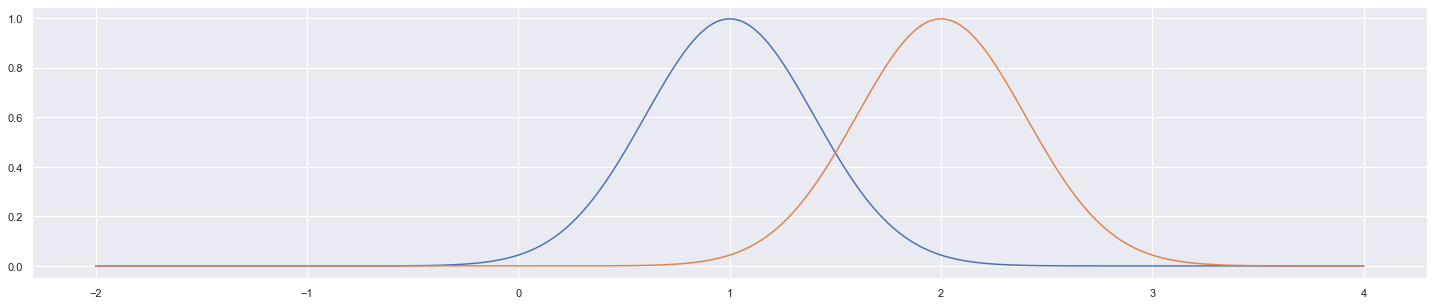

In [22]:
# Data.
x = np.linspace(-2.0, 4.0, 1000)

# Plot size.
fig, ax = plt.subplots(figsize=(25,5))

# Plotting.
y_a = ss.norm.pdf(x, 1, 0.4)
y_b = ss.norm.pdf(x, 2, 0.4)
ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

The blue and red lines represent the population of sample *a* and *b* we have generated. Curves are normally distributed. The area under the curve gives the probability of seeing the value in that range. 

### CRITICAL VALUE

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples. It is the probility value below which we reject the null hypothesis. It is decided before the test is being done, but is usually set to be 0,05.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

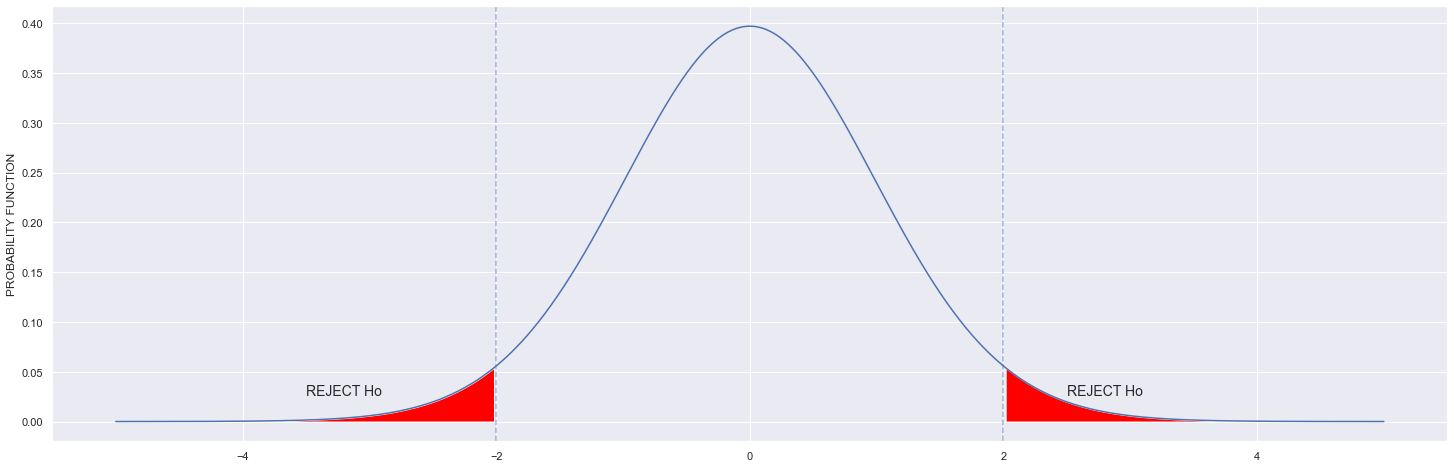

In [23]:
# The critical probability value.
critical = 0.05

d_sm = 50
# Create the figure.
fig, ax = plt.subplots(figsize=(25,8))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t)

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor = "red")
ax.fill_between(tail_two['x'], tail_two['t'], 0,  facecolor = "red")
plt.ylabel("PROBABILITY FUNCTION")


ax.text (x = 2.5, y = 0.01, s = "REJECT Ho\n", fontsize = 14)
ax.text (x = -3.5, y = 0.01, s = "REJECT Ho\n", fontsize = 14)
ax.axvline (2, ls = "--", alpha = 0.5)
ax.axvline (-2, ls = "--", alpha = 0.5)

plt.show()

### ERRORS

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Even though hypothesis tests are meant to be reliable, there are two types of errors that can still occur:
- Type I error - FALSE POSITIVE
- Type II error - FALSE NEGATIVE

#### TYPE I ERROR

They happen when the tester validates a statistically significant difference even though there isn’t one. The null hypothesis is true but rejected. This means that you will wrongfully assume that your hypothesis testing has worked even though it hasn’t - thus false positive.

In [24]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}% times we rejected the null hypothesis, even though we shouldn't.")

5.01% times we rejected the null hypothesis, even though we shouldn't.


#### TYPE II ERROR

Type II errors happen when the null hypothesis is false and you subsequently fail to reject it. It is also called False negative. The chance of a false negative is harder to quantify. It depends on how close the means are.

In [25]:
# Let's run 10000 t-tests where the population means are NOT equal.
# How often will we not reject the hypothesis?

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.1, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
notrejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is greater than critical, do not reject.
    if p > critical:
        notrejects = notrejects + 1

# Print results.
typeii = 100.0 * (notrejects / trials)
print(f"{typeii:0.2f}% of the time we don't reject the null hypothesis, even though we should.")

35.42% of the time we don't reject the null hypothesis, even though we should.


### THE $T$-TEST

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

There are three main types of t-test:

- One sample t-test tests the mean of a single group against a known mean.
- Independent Samples t-test compares the means for two groups.
- Paired sample t-test compares means from the same group at different times (say, one year apart).


### INDEPENDENT SAMPLES T - TEST

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We will create a fake data set with specific properties to investigate numerical methods. There are multiple data that can be scraped online for this purpose, but simulating our own data gives us more control.

In [26]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

df

,Category,Value
0,A,0.534347
1,A,0.823775
2,A,0.962542
3,A,1.257903
4,A,0.646015
...,...,...
75,B,1.738622
76,B,1.598163
77,B,1.576327
78,B,1.808382


Looking at the generated data above gives us an idea how the data is spread, but it is still not very illuminating. Visualising the data will give us better insight.

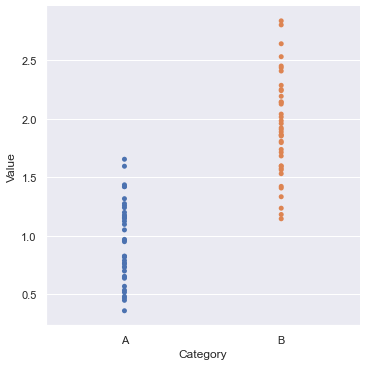

In [27]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

We can clearly see how numbers in group A are concentrated around the value 1, while numbers in the group B are concentrated around value 2.

### CALCULATION

There are many ways of doing $t$-test in Python. Below are formula implementations, where $t$-test is calculated *"by hand"*.

##### BY HAND

In [28]:
# Calculate t statistic "by hand".
# https://en.wikipedia.org/wiki/Test_statistic

# Length of the arrays.
n1 = len(a)
n2 = len(b)

# Means of the samples.
m1 = np.sum(a) / n1
m2 = np.sum(b) / n2

# Sample standard deviations.
s1 = np.sqrt(np.sum((a - m1)**2) / (n1 - 1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n2 - 1))

df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))

t

-11.314930811794893

In [29]:
# Calculate t statistic "by hand".
# https://www.youtube.com/watch?v=pTmLQvMM-1M&ab_channel=BozemanScience

import statistics as st
import math

# Mean
m1 = st.mean(a)
m2 = st.mean(b)

# Standard deviations
s1 = st.stdev(a)
s2 = st.stdev(b)

# Variance
v1 = s1**2
v2 = s2**2

# Quantity
n1 = len(a)
n2 = len(b)

t = (m1-m2)/(math.sqrt((v1/n1)+(v2/n2)))
t

-11.314930811794888

The more simple way would be using a single function call. There are many different functions in Python used for this purpose, and the ones shown below are *scipy* and *statmodels*.

##### SCIPY

In [30]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -11.314930811794891	p-value: 4.010118914501647e-18
P_scipy: 0.00


##### STATMODELS

In [31]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -11.31493081179489	p-value: 4.010118914501704e-18	Deg Free: 78.0
P_statsmodels: 0.00


### PAIRED SAMPLES T - TEST

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In [32]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [33]:
# Extract the first sample from the data set.
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [34]:
# Extract the second sample from the data set.
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [35]:
# Run a paired samples t-test.
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [36]:
# In one way, this is equivalent to a one sample t-test.
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [37]:
# That's how statsmodels suggests you do the test.
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

### PROBLEMS WITH MULTIPLE T-TESTS

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

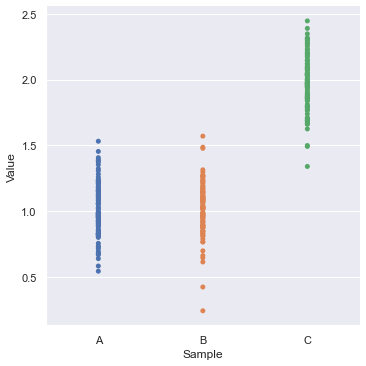

In [38]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [39]:
# t-Tests - one for each pair.
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.82	p_AC: 0.00	p_BC: 0.00


Let's run 10000 t-tests where the population means are equal. We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time. We expect to incorrectly reject the null hypothesis 5% of the time.

In [40]:
# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the t-tests.
    t1, p1 = ss.ttest_ind(sample1, sample2)
    t2, p2 = ss.ttest_ind(sample1, sample3)
    t3, p3 = ss.ttest_ind(sample2, sample3)
    # If any is less than critical, reject.
    if p1 <= critical or p2 <= critical or p3 <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

11.98%


### ANOVA

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

If we have more then three samples we might be tempted to run the t test. Generally, that would be wrong. This is because it's hard to say how errors will stack up. In this case we use ANOVA.

In [41]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

F:747.47 P:0.00


Let's run 10000 ANOVAs where the population means are equal. We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time. We expect to incorrectly reject the null hypothesis 5% of the time.

In [42]:
# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the test.
    F, p = ss.f_oneway(sample1, sample2, sample3)
    # If any is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.86%


***

<hr style="border-top: 20px solid #add8e6;" />

<h4 style="color: #001a79;">EXERCISE 3</h4>

<h5 style="color: #001a79;">Take the code from the Examples section of the scipy stats documentation for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.</h5>
<hr style="border-top: 1px solid #001a79;" />

- https://www.investopedia.com/terms/t/t-test.asp#:~:text=The%20unequal%20variance%20t%2Dtest,also%20called%20Welch's%20t%2Dtest.
- https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp
- https://matthew-brett.github.io/cfd2020/permutation/permutation_and_t_test.html#:~:text=The%20permutation%20test%20is%20more,the%20permutation%20test%20does%20not.
- https://www.pythonfordatascience.org/independent-samples-t-test-python/

#### scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. [1] Parametric tests are those that make assumptions about the parameters of the population distribution from which the sample is drawn. [2] This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [43]:
from scipy import stats
rng = np.random.default_rng()

#### TEST WITH SAMPLE WITH IDENTICAL MEANS
***

##### NORMALLY DISTRIBUTED DATA

In [44]:
# Generate a normal continuous random variables.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
    # The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

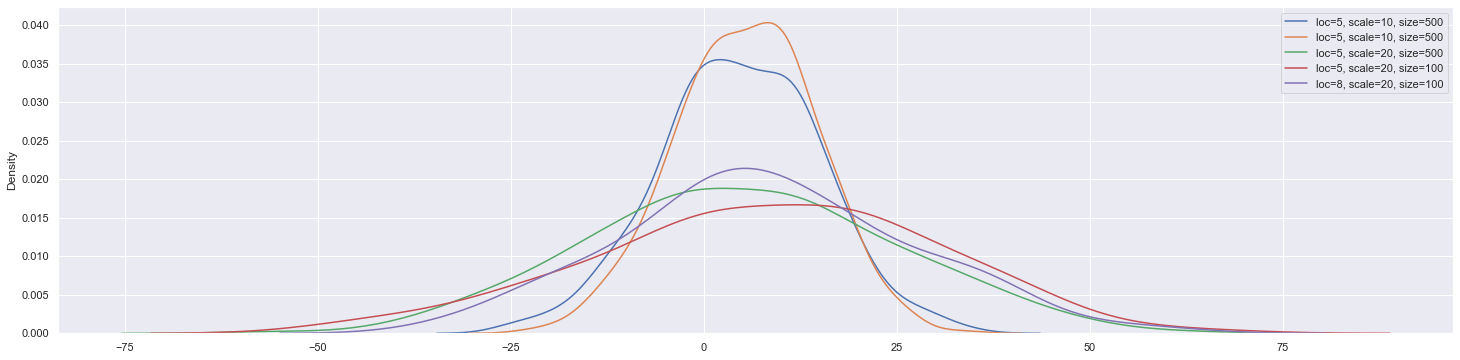

In [45]:
import seaborn as sns
plt.figure(figsize = (25,6))
sns.kdeplot(rvs1, label="loc=5, scale=10, size=500")
sns.kdeplot(rvs2, label="loc=5, scale=10, size=500")
sns.kdeplot(rvs3, label="loc=5, scale=20, size=500")
sns.kdeplot(rvs4, label="loc=5, scale=20, size=100")
sns.kdeplot(rvs5, label="loc=8, scale=20, size=100")
plt.legend()
plt.show()

The equal variance t-test is an independent t-test and is used when the number of samples in each group is the same, or the variance of the two data sets is similar. [3]

In [46]:
# Perform a standard independent 2 sample test that assumes equal population variances - equal_var = True (default)
test1 = stats.ttest_ind(rvs1, rvs2, equal_var=True)
# Perform Welch’s t-test, which does not assume equal population variance - equal_var = False
test2 = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print("t-statistic: ", test1[0], "p-value: ", test1[1])
print("t-statistic: ", test2[0], "p-value: ", test2[1])

t-statistic:  -1.3017184418852397 p-value:  0.19331303645873774
t-statistic:  -1.3017184418852397 p-value:  0.19331846561532476


The unequal variance t-test is an independent t-test and is used when the number of samples in each group is different, and the variance of the two data sets is also different. This test is also called Welch's t-test.[3]

In [47]:
test1 = stats.ttest_ind(rvs1, rvs3)
test2 = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print("t-statistic: ", test1[0], "p-value: ", test1[1])
print("t-statistic: ", test2[0], "p-value: ", test2[1])

t-statistic:  -0.19983039298931182 p-value:  0.8416539393898705
t-statistic:  -0.19983039298931182 p-value:  0.8416673377077138


ttest_ind underestimates p for unequal variances.

When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

In [48]:
test1 = stats.ttest_ind(rvs1, rvs4)
test2 = stats.ttest_ind(rvs1, rvs4, equal_var=False)
print("t-statistic: ", test1[0], "p-value: ", test1[1])
print("t-statistic: ", test2[0], "p-value: ", test2[1])

t-statistic:  -2.3057714037572015 p-value:  0.02146464931355552
t-statistic:  -1.4730360315828743 p-value:  0.1436450180180564


T-test with different means, variance, and n:

In [49]:

test1 = stats.ttest_ind(rvs1, rvs5)
test2 = stats.ttest_ind(rvs1, rvs5, equal_var=False)
print("t-statistic: ", test1[0], "p-value: ", test1[1])
print("t-statistic: ", test2[0], "p-value: ", test2[1])

t-statistic:  -2.609732074561153 p-value:  0.009288196546775493
t-statistic:  -1.8178570620051238 p-value:  0.07176241927201046


When performing a permutation test, more permutations typically yields more accurate results. Use a np.random.Generator to ensure reproducibility:

In [50]:
test3 = stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)
print("t-statistic: ", test3[0], "p-value: ", test3[1])

t-statistic:  -2.609732074561153 p-value:  0.009299070092990702


Take these two samples, one of which has an extreme tail.

In [51]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

When both the normality and equal variances assumptions are violated, we can use a combination of the Trimmed Means t-Test and Welch’s t-Test, called the Yuen-Welch Test.[4] Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim*len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim*len(b)) is 0.

In [52]:
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

<hr style="border-top: 20px solid #add8e6;" />

## REFERENCES

TEA TEST
- https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8
- https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/
- https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html

STUDENT T - TEST
- https://en.wikipedia.org/wiki/Student%27s_t-test
- https://www.statisticshowto.com/probability-and-statistics/t-test/
- https://www.investopedia.com/terms/t/t-test.asp
- https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp
- https://matthew-brett.github.io/cfd2020/permutation/permutation_and_t_test.html
- https://www.pythonfordatascience.org/independent-samples-t-test-python/
- https://www.real-statistics.com/students-t-distribution/problems-data-t-tests/yuen-welchs-test/